<h1> Data Analysis with Python</h1>


<h2> Data Wrangling</h2>

<h3> Importing important libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

<p> Creating a list of headers</p>

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
df = pd.read_csv(path, names = headers)

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3>Replacing '?' with NAN</h3>

In [6]:
df.replace('?',np.nan,inplace = True)

In [7]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<p>Their are two function to check a empty column or row
1.isnull()
2.notnull()</p>

In [8]:
missing_data = df.isnull()

In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

<h2> Handling missing data</h2>

<h3>1.Replace by mean:</h3>

"normalized-losses": 41 missing data, replace them with mean
"stroke": 4 missing data, replace them with mean
"bore": 4 missing data, replace them with mean
"horsepower": 2 missing data, replace them with mean
"peak-rpm": 2 missing data, replace them with mean

In [10]:
avg_norm_loss = df["normalized-losses"].astype('float').mean(axis=0)
avg_stroke = df["stroke"].astype('float').mean(axis=0)
avg_bore = df["bore"].astype('float').mean(axis=0)
avg_horsepower = df["horsepower"].astype('float').mean(axis=0)
avg_peakrpm = df["peak-rpm"].astype('float').mean(axis=0)
print("the mean of stroke,bore, horsepower and avg_peakrpm is:",avg_stroke,avg_bore,avg_horsepower,avg_peakrpm)

the mean of stroke,bore, horsepower and avg_peakrpm is: 3.2554228855721337 3.3297512437810957 104.25615763546799 5125.369458128079


<p>Replace "NaN" with mean value </p>

In [11]:
df["normalized-losses"].replace(np.nan,avg_norm_loss,inplace=True)
df["stroke"].replace(np.nan,avg_stroke,inplace = True)
df["bore"].replace(np.nan,avg_bore,inplace = True)
df["horsepower"].replace(np.nan,avg_horsepower,inplace = True)
df["peak-rpm"].replace(np.nan,avg_peakrpm,inplace = True)

<h3>2. Replace "num-of-doors" by frequency</h3>


In [12]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [13]:
df['num-of-doors'].replace(np.nan,'four', inplace = True)

<h3>Finally, let's drop all rows that do not have price data</h3>

In [14]:
# simply drop whole row with NaN in "price" column
df.dropna(subset = ["price"], axis = 0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

<p>Good! Now, we have a dataset with no missing values.</p>

In [15]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p> Converting "bore", "stroke", "peak-rpm" and price column to float and normalized-losses to int</p>

In [16]:
df[["bore", "stroke", "peak-rpm", "price"]] = df[["bore", "stroke", "peak-rpm","price"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

<h3>Data Standardization</h3>

<p>Transform mpg to L/100km:</p>

In [17]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]

# renaming the column also 
df.rename(columns = {'"city-mpg"':'city-L/100km'},inplace = True)
df.rename(columns = {'"highway-mpg"':'highway-L/100km'},inplace = True)

<h3>Data Normalization</h3>

In [18]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h3>Binning</h3>

<p>Convert data to correct format:</p>

In [19]:
df['horsepower'] = df['horsepower'].astype('int',copy = True)


<p>Let's plot the histogram of horsepower to see what the distribution of horsepower looks like.</p>

Text(0.5, 1.0, 'horsepower bins')

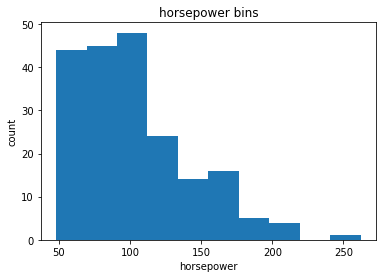

In [20]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.</p>

In [21]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [22]:
group_names = ['Low', 'Medium', 'High']

In [23]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Text(0.5, 1.0, 'horsepower bins')

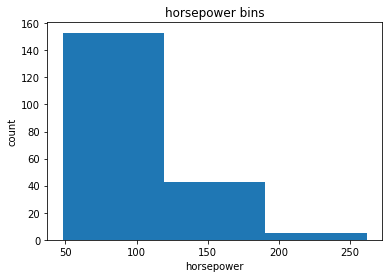

In [24]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<h3>Indicator Variable (or Dummy Variable)</h3>

In [25]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [26]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()


,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [28]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

In [29]:
# merge data frame "df" and "dummy_variable_2" 
df=pd.concat([df,dummy_variable_2],axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

In [30]:
df.to_csv('clean_df.csv')

<h3>Congratulations! Cleaning is Completed</h3>

<h2> Exploratory Data Analysis </h2>

In [31]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


<h2>Continuous Numerical Variables:</h2>

<h3>Let's find the scatterplot of "engine-size" and "price".</h3>

(0.0, 53347.579716369335)

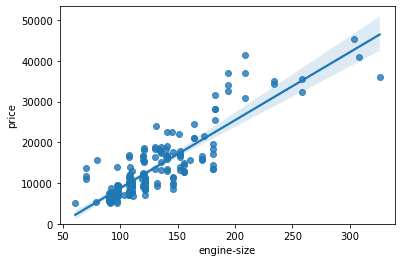

In [153]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

In [ ]:
df[["engine-size","price"]].corr()

<h3>Let's find the scatterplot of "highway-mpg" and "price".</h3>

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

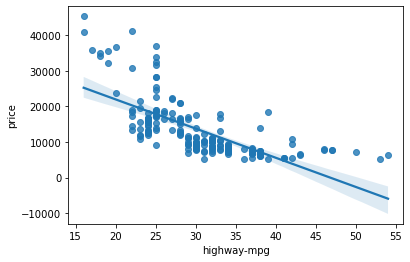

In [33]:
# highway-mpg size as potential predictor variable of price
sns.regplot(x="highway-mpg", y="price", data=df)

<p>As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>

In [34]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<p>We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.</p>

<h2>Let's see if "peak-rpm" is a predictor variable of "price".</h2>

(0.0, 47414.1)

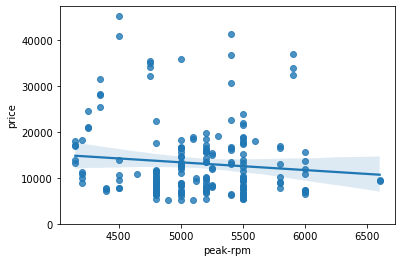

In [152]:
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>

In [36]:
df[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<h2>Let's see if "stroke" is a predictor variable of "price".</h2>

(0.0, 47414.1)

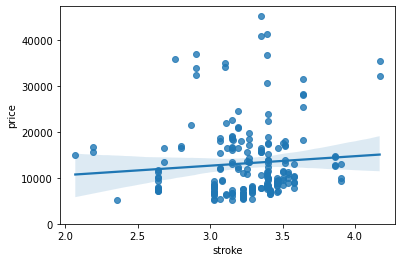

In [151]:
sns.regplot(x="stroke", y="price", data=df)
plt.ylim(0,)

<p>Stroke does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>

In [38]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<h2>Categorical Variables</h2>

<h3>Let's look at the relationship between "body-style" and "price".</h3>

<AxesSubplot:xlabel='body-style', ylabel='price'>

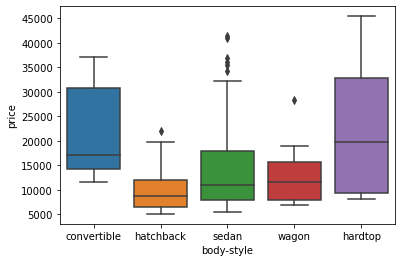

In [39]:
sns.boxplot(x = "body-style", y = "price", data=df)

<p>We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price":</p>

<AxesSubplot:xlabel='engine-location', ylabel='price'>

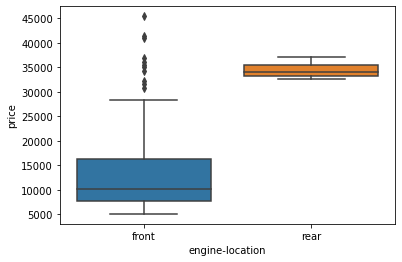

In [40]:
sns.boxplot(x="engine-location", y="price", data=df)

<p>Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.</p>

<p>Let's examine "drive-wheels" and "price".</p>

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

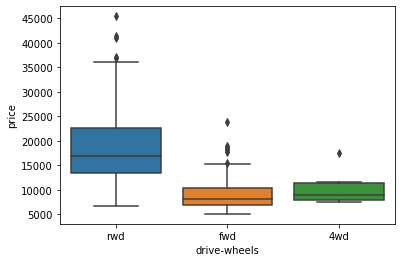

In [41]:
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>

<h2>3. Descriptive Statistical Analysis</h2>

<p>Let's first take a look at the variables by utilizing a description method.</p>

In [42]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


<p>The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:</p>

In [43]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


<h3>Value Counts</h3>

<p>Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].</p>

In [44]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

<p>We can convert the series to a dataframe as follows:</p>

In [45]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


<p>Let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'.</p>

In [46]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


<p>Now let's rename the index to 'drive-wheels':</p>

In [47]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


<p>We can repeat the above process for the variable 'engine-location'.</p>

In [48]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name ='engine-location'

engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


<p>After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.</p>

<h2>4. Basics of Grouping</h2>

<p> Using unique function we can find how many diferrent combination we have in a particular column</p>

In [49]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [50]:
df["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [51]:
df_group_one = df[["drive-wheels","body-style","price"]]

<p>We can then calculate the average price for each of the different categories of data.</p>

In [52]:
df_group_one = df_group_one.groupby(["drive-wheels"],as_index = False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


<p>From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.</p>

In [53]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p>We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.</p>

In [54]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [55]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<p>Using the "groupby" function to find the average "price" of each car based on "body-style".</p>

In [56]:
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<h3>Variables: Drive Wheels and Body Style vs. Price</h3>

<p>Let's use a heat map to visualize the relationship between Body Style vs Price.</p>

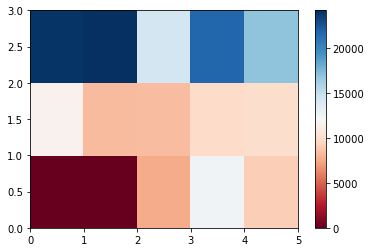

In [150]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.</p>

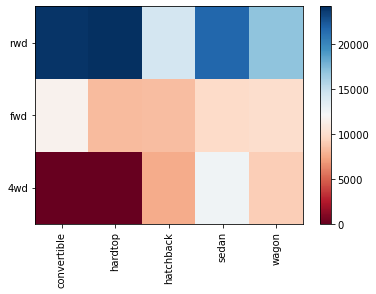

In [149]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h1>5. Correlation and Causation</h1>

<h2>Pearson Correlation</h2>

<h2>P-value</h2>

In [59]:
from scipy import stats

<h3>Wheel-Base vs. Price</h3>

<p>Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.</p>

In [60]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20


<p>Since the p-value is  
<
  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>

<h3>Horsepower vs. Price</h3>

<p>Let's calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.</p>

In [61]:
pearson_coef, p_value = stats.pearsonr(df["horsepower"],df["price"])
print("The Pearson  Correlation Coefficient is", pearson_coef," with a P-value of P =",p_value)

The Pearson  Correlation Coefficient is 0.8096068016571054  with a P-value of P = 6.273536270650504e-48


<p>Since the p-value is  
<
  0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>

<h2>Length vs. Price</h2>

<p>Let's calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price'</p>

In [62]:
pearson_coef, p_value = stats.pearsonr(df["length"],df["price"])
print("The Pearson  Correlation Coefficient is", pearson_coef," with a P-value of P =",p_value)

The Pearson  Correlation Coefficient is 0.6906283804483642  with a P-value of P = 8.016477466158759e-30


<p>Since the p-value is  
<
  0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

<h2>Width vs. Price</h2>

<p>Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price'</p>

In [63]:
pearson_coef, p_value = stats.pearsonr(df["width"],df["price"])
print("The Pearson  Correlation Coefficient is", pearson_coef," with a P-value of P =",p_value)

The Pearson  Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


<p>Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).</p>

<h2>Curb-Weight vs. Price</h2>

<p>Let's calculate the Pearson Correlation Coefficient and P-value of 'Curb-Weight' and 'price'</p>

In [64]:
pearson_coef, p_value = stats.pearsonr(df["curb-weight"],df["price"])
print("The Pearson  Correlation Coefficient is", pearson_coef," with a P-value of P =",p_value)

The Pearson  Correlation Coefficient is 0.8344145257702846  with a P-value of P = 2.1895772388936914e-53


<p>Since the p-value is  
<
  0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

<h2>Engine-Size vs. Price</h2>

<p>Let's calculate the Pearson Correlation Coefficient and P-value of 'Curb-Weight' and 'price'</p>

In [65]:
pearson_coef, p_value = stats.pearsonr(df["engine-size"],df["price"])
print("The Pearson  Correlation Coefficient is", pearson_coef," with a P-value of P =",p_value)

The Pearson  Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


<p>Since the p-value is  
<
  0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

<h2>Bore vs. Price</h2>

<p>Let's calculate the Pearson Correlation Coefficient and P-value of 'Curb-Weight' and 'price'</p>

In [66]:
pearson_coef, p_value = stats.pearsonr(df["bore"],df["price"])
print("The Pearson  Correlation Coefficient is", pearson_coef," with a P-value of P =",p_value)

The Pearson  Correlation Coefficient is 0.5431553832626602  with a P-value of P = 8.049189483935489e-17


<p>Since the p-value is  
<
  0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>

<h2>City-mpg vs. Price</h2>

<p>Let's calculate the Pearson Correlation Coefficient and P-value of 'City-mpg' and 'price'</p>

In [67]:
pearson_coef, p_value = stats.pearsonr(df["city-mpg"],df["price"])
print("The Pearson  Correlation Coefficient is", pearson_coef," with a P-value of P =",p_value)

The Pearson  Correlation Coefficient is -0.6865710067844677  with a P-value of P = 2.321132065567674e-29


<p>Since the p-value is  
<
  0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>

<h2>Highway-mpg vs. Price</h2>

<p>Let's calculate the Pearson Correlation Coefficient and P-value of 'City-mpg' and 'price'</p>

In [68]:
pearson_coef, p_value = stats.pearsonr(df["highway-mpg"],df["price"])
print("The Pearson  Correlation Coefficient is", pearson_coef," with a P-value of P =",p_value)

The Pearson  Correlation Coefficient is -0.7046922650589529  with a P-value of P = 1.7495471144477352e-31


<p>Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.</p>

<h1>6. ANOVA</h1>

<h2>ANOVA: Analysis of Variance</h2>

<h1>Conclusion: Important Variables</h1>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

<p>Continuous numerical variables:</p>

<p>Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore</p>

<p>Categorical variables:</p>

<p>Drive-wheels</p>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

<h1>Model Development</h1>

<h2>1. Linear Regression and Multiple Linear Regression</h2>

<h3>Simple Linear Regression</h3>

<h3>Let's load the modules for linear regression:</h3>

In [69]:
from sklearn.linear_model import LinearRegression

<h3>Create the linear regression object:<h3>

In [141]:
lm = LinearRegression()
lm

LinearRegression()

In [71]:
X = df[['highway-mpg']]
Y = df['price']

In [72]:
lm.fit(X,Y)

LinearRegression()

<P>We can output a prediction:</P>

In [73]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<p>What is the value of the intercept (a)?</p>

In [74]:
lm.intercept_

38423.305858157386

<p>What is the value of the slope (b)?</p>

In [75]:
lm.coef_

array([-821.73337832])

<h3> Let's create a model using "engine-size" as Independent variable</h3>

In [76]:
lm1 = LinearRegression()

In [77]:
X1 = df[["engine-size"]]
Y = df[["price"]]
lm1.fit(X1,Y)
lm1


LinearRegression()

<p>Let's predict the price of the car</p>

In [78]:
Yhat1=lm1.predict(X1)
Yhat1[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

<p>the slope and intercept of the model.</p>

In [79]:
lm1.coef_

array([[166.86001569]])

In [80]:
lm1.intercept_

array([-7963.33890628])

<p>equation of the predicted line</p>

Yhat=-7963.34 + 166.86*X
Price=-7963.34 + 166.86*engine-size

<h3> Multiple Linear Regression </h3>

<p>What if we want to predict car price using more than one variable?</p>

<h4>Let's develop a model using "Horsepower" ,"Curb-weight", "Engine-size" and "Highway-mpg" as the predictor variables.</h4>

In [140]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

<p>Fit the linear model using the four above-mentioned variables.</p>

In [82]:
lm.fit(Z,df["price"])

LinearRegression()

<p>What is the value of the intercept(a)?</p>

In [83]:
lm.intercept_

-15811.863767729232

<p>What are the values of the coefficients (b1, b2, b3, b4)?</p>

In [84]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

What is the linear function we get in this example?

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>

<p>Creating and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".</p>

In [85]:
Z2 = df[["normalized-losses", "highway-mpg"]]
Y = df[["price"]]
lm2 = LinearRegression()
lm2.fit(Z2,Y)
Yhat = lm2.predict(Z2)

<p>The coefficient of the model is</p>

In [86]:
lm2.coef_

array([[   1.49789586, -820.45434016]])

<h2>2. Model Evaluation Using Visualization</h2>

<p>Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.</p>

<h3> Regression Plot</h3>

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

<p>Let's visualize highway-mpg as potential predictor variable of price:</p>

(0.0, 48165.4047222049)

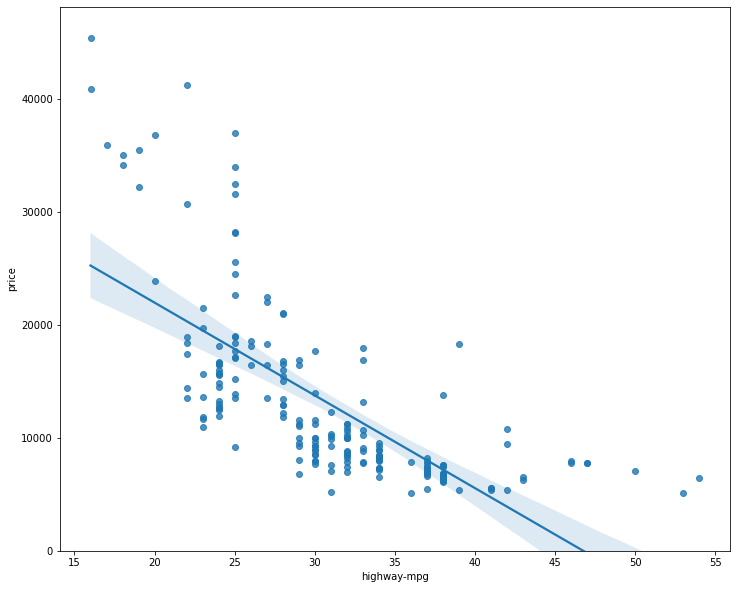

In [134]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

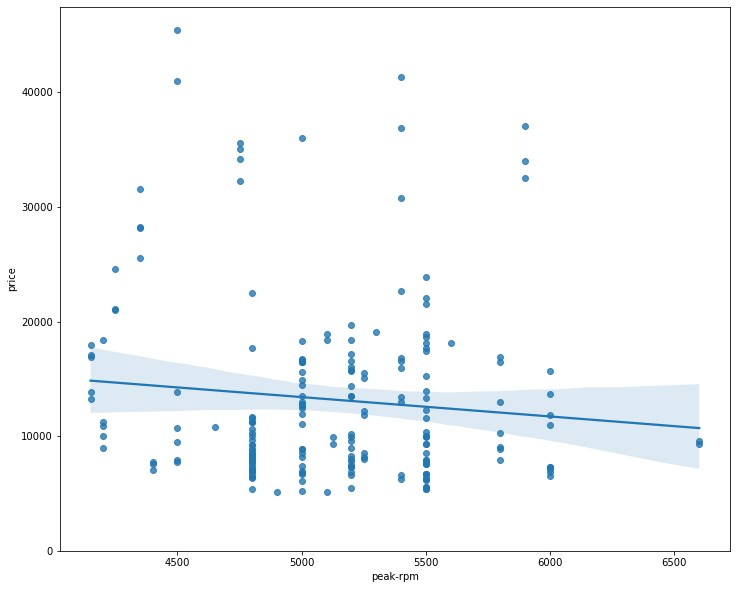

In [135]:

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

Regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [136]:
df[["highway-mpg","peak-rpm","price"]].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


<h3>Residual Plot</h3>

C:\Users\masi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


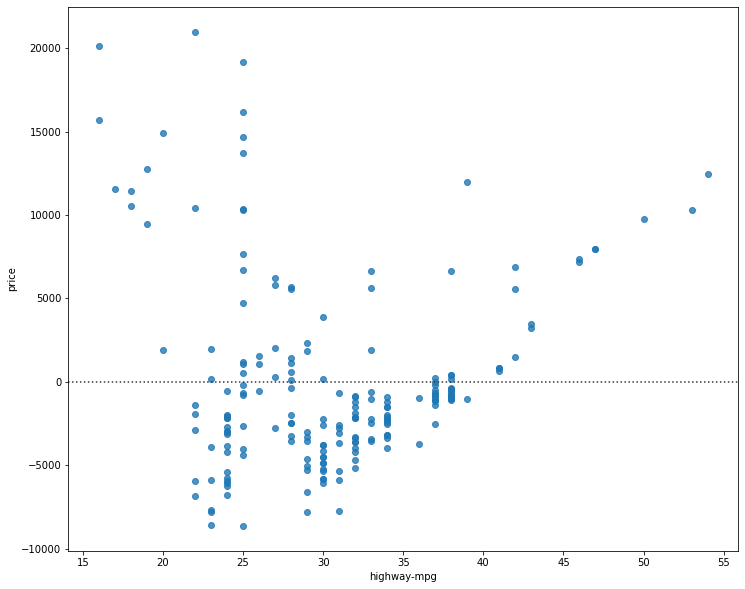

In [137]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<h2>Multiple Linear Regression</h2>

<h3>Distribution Plot</h3>

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [145]:
lm = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z,df["price"])
Y_hat = lm.predict(Z)

C:\Users\masi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\masi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


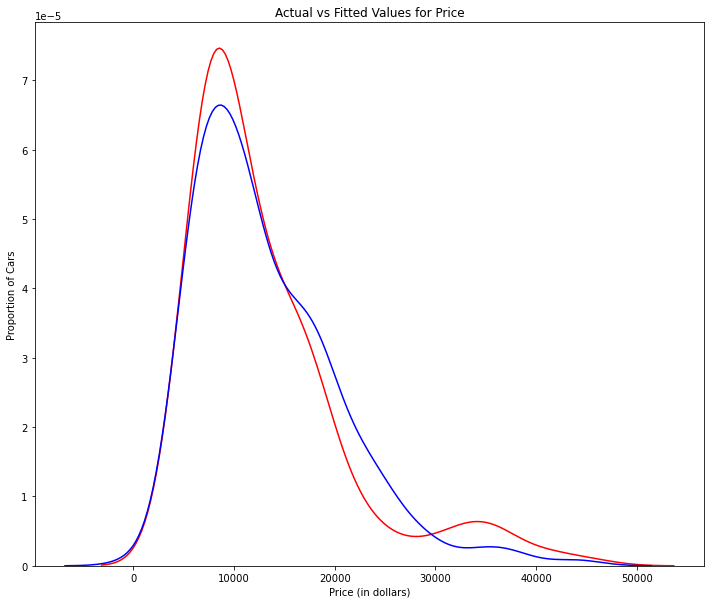

In [148]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

3. Polynomial Regression and Pipelines

We will use the following function to plot the data:

In [126]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables:

In [127]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [128]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function:

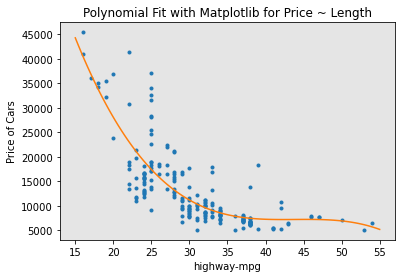

In [129]:
PlotPolly(p, x, y, 'highway-mpg')

In [130]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

If  we Create 11 order polynomial model with the variables x and y from above.

           12             11            10           9         8
2.566e-09 x  - 1.086e-06 x  + 0.000208 x  - 0.02382 x + 1.816 x
          7        6             5             4             3
 - 97.05 x + 3725 x - 1.034e+05 x + 2.061e+06 x - 2.873e+07 x
              2
 + 2.657e+08 x - 1.465e+09 x + 3.635e+09


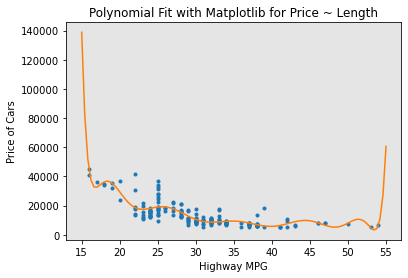

In [131]:
# Write your code below and press Shift+Enter to execute 
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 12)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [132]:
from sklearn.preprocessing import PolynomialFeatures

We create a PolynomialFeatures object of degree 2:

In [133]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [101]:
Z_pr=pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.

In [102]:
Z.shape

(201, 4)

After the transformation, there are 201 samples and 15 features.

In [103]:
Z_pr.shape

(201, 15)

Pipeline

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [105]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [106]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [107]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [108]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [109]:
# Write your code below and press Shift+Enter to execute 
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

<h2>4. Measures for In-Sample Evaluation</h2>

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

<b>R^2 / R-squared</b>

<b>Mean Squared Error (MSE)</b>

<h3>Model 1: Simple Linear Regression</h3>

Let's calculate the R^2:

In [110]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE:

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [111]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


Let's import the function mean_squared_error from the module metrics:

In [112]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:

In [113]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


<h2>Model 2: Multiple Linear Regression</h2>

Let's calculate the R^2:


In [114]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093732522175299


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE.

In [115]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:

In [116]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.34981888


<h2>Model 3: Polynomial Fit</h2>

Let's calculate the R^2.

In [117]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:

In [118]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

<h2>MSE</h2>

We can also calculate the MSE:

In [119]:
mean_squared_error(df['price'], p(x))

20474146.426361218

<h2>5. Prediction and Decision Making</h2>

In [120]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:

In [121]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model:

In [122]:
lm.fit(X, Y)
lm

LinearRegression()

Produce a prediction:

In [124]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\masi\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

We can plot the data:

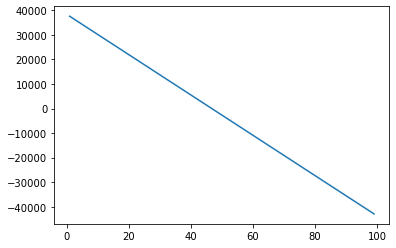

In [125]:
plt.plot(new_input, yhat)
plt.show()

<h2>Conclusion</h2>

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.